# Ejercicio 2
Implemente un enfoque de modelado multiescala concurrente en Python para simular el flujo de agua a través de una formación rocosa porosa. Utilice tanto un modelo macroscópico (ley de Darcy) como un modelo microscópico (ecuaciones de Navier-Stokes) para describir el flujo.

### Solución propuesta por ChatGPT
Se utilizó el siguiente prompt para generar el código con ChatGPT:

<font color=lightblue>
Necesito un código de python que implemente un enfoque de modelado multiescala concurrente en Python para simular el flujo de agua a través de una formación rocosa porosa. Utilice tanto un modelo macroscópico (ley de Darcy) como un modelo microscópico (ecuaciones de Navier-Stokes) para describir el flujo. Considere los siguientes pasos propuestos

1. Cree una función que simule el flujo de agua utilizando la ley de Darcy en la macroescala.
2. Cree una función que simule el flujo de agua utilizando las ecuaciones de Navier-Stokes a escala
microscópica.
3. Implementar un enfoque multiescala concurrente donde el modelo macroscópico influya en el modelo
microscópico y viceversa.

Utiliza la versión simplificada de Navier-Stokes y la ley de Darcy utilizando los siguientes parámetros:
- k: Permeabilidad
- A: Área
- P: Presiones en extremos
- L: Longitud de la formación
- rho: Densidad del agua
- mu: Viscosidad del agua
</font>

Con este promt, ChatGPT desarrolló un programa que se utilizó como base para la siguiente implementación. El código generado por ChatGPT se encuentra en el archivo [ejercicio2_chatgpt.py](Reference/ejercicio2_chatgpt.py). Una captura de pantalla del chat se encuentra en el archivo [ejercicio2_chatgpt.png](Screens/ejercicio2_chatgpt.png).


### Importar librerías

In [124]:
import matplotlib.pyplot as plt

### Parámetros de entrada

In [125]:
# Parámetros
k = 1e-12  # Permeabilidad
A = 1e-4   # Área
P = [100, 90]  # Presiones en extremos
L = 10  # Longitud de la formación
rho = 1000  # Densidad del agua
mu = 0.001  # Viscosidad del agua
steps = 10000  # Número de pasos
rate = 0.1  # Tasa de flujo

### Implementación de funciones de flujo

In [126]:
def darcyFlow(k, A, P, deltaX):
    deltaP = P[0] - P[1]
    q = -k * A * (deltaP / deltaX)
    return q

def navierStokesFlow(rho, P, L):
    deltaP = P[0] - P[1]
    v = -deltaP / (rho * L)
    return v

In [127]:
def concurrentMultiscale(k, A, P, L, rho, mu, timesteps):
    macroFlows = []
    microFlows = []
    
    for t in range(timesteps):
        qMacro = darcyFlow(k, A, P, L)
        vMicro = navierStokesFlow(rho, P, L)
        
        # Aquí hay interacción entre los dos modelos, simplemente asumiendo un ajuste lineal
        qMacro += vMicro
        vMicro += qMacro
        
        macroFlows.append(qMacro)
        microFlows.append(vMicro)

        # Actualización de la presión basada en el flujo
        P[0] -= qMacro * rate
        P[1] += vMicro * rate

    return macroFlows, microFlows

In [128]:
def plotFlows(macro_flows, micro_flows):
    plt.plot(macro_flows, label="Macro (Darcy)", color='blue')
    plt.plot(micro_flows, label="Micro (Navier-Stokes)", color='red')
    plt.xlabel('Time steps')
    plt.ylabel('Flow')
    plt.legend()
    plt.title('Water flow through porous rock formation')
    plt.show()

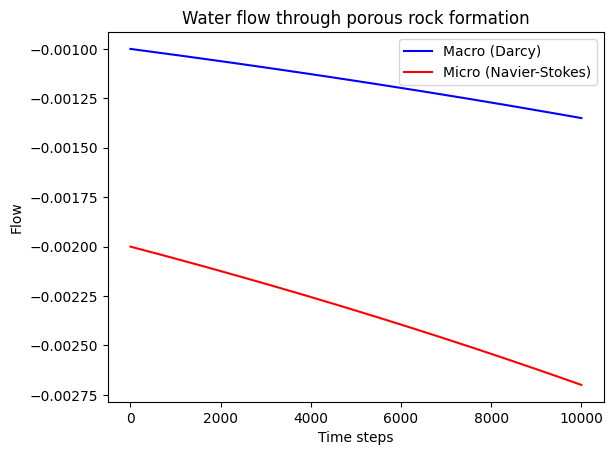

In [129]:
macroFlows, microFlows = concurrentMultiscale(k, A, P, L, rho, mu, steps)
plotFlows(macroFlows, microFlows)